# Linear Regression Assignment

## Probelm Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 
Specifically, BoomBikes want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
 -  Which variables are significant in predicting the demand for shared bikes.
 -  How well those variables describe the bike demandsnds

## Step 1: Reading and Understanding the Data

In [1]:
#import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [3]:
# Reading the day.csv file

bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Understanding the file size and datatypes
print("Size of loan file:")
print(bike_sharing.shape)
print("Datatypes of columns:")
print(bike_sharing.dtypes)
print("Day file info:")
print(bike_sharing.info())

Size of loan file:
(730, 16)
Datatypes of columns:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
Day file info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp   

In [7]:
# Getting insights of the features
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


__Column analysis to determine if there are any columns that can be dropped from the dataset__

In [9]:
#Number of null values in each column
bike_sharing.isnull().sum().sort_values(ascending=False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no column with null values. No need to drop any columns.

In [11]:
#checking for duplicate rows. There are no duplicate rows
bike_sharing[bike_sharing.duplicated()].shape

(0, 16)

In [13]:
# Removing unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
bike_sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_sharing.shape

(730, 12)

### Understanding Data Dictionary

In [15]:
# Season column contains numeric values. Converting it to different seasons
print(bike_sharing['season'].value_counts())
bike_sharing['season'] = bike_sharing['season'].astype(str)
bike_sharing[['season']] = bike_sharing[['season']].apply(lambda x: x.map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'}))
bike_sharing.head()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
#Checking the count after changing the numeric values to seasons to make sure the conversion is correct
print(bike_sharing['season'].value_counts())

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


In [19]:
#mnth column contains all numeric values. Assigning actual month names to the corresponding numeric values
print(bike_sharing['mnth'].value_counts())
bike_sharing['mnth'] = bike_sharing['mnth'].astype(str)
bike_sharing[['mnth']] = bike_sharing[['mnth']].apply(lambda x: x.map({'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct','11':'Nov', '12':'Dec'}))
bike_sharing.head()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
#Checking the count after changing the numeric values to month name to make sure the conversion is correct
bike_sharing['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [23]:
#weather day is a holiday or not
bike_sharing['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [25]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
#weekday column contains all numeric values. Assigning actual week days name to the corresponding numeric values
bike_sharing['weekday'].astype('category').value_counts()
bike_sharing['weekday'] = bike_sharing['weekday'].astype(str)
bike_sharing[['weekday']] = bike_sharing[['weekday']].apply(lambda x: x.map({'0':'Tues', '1':'Wed', '2':'Thurs', '3':'Fri', '4':'Sat', '5':'Sun', '6':'Mon'}))
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
bike_sharing['weekday'].astype('category').value_counts()

weekday
Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: count, dtype: int64

In [31]:
#if day is neither weekend nor holiday is 1, otherwise is 0
bike_sharing['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [33]:
#weathersit column contains numeric values. Assigning string for more readability
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
print(bike_sharing['weathersit'].astype('category').value_counts())
bike_sharing['weathersit'] = bike_sharing['weathersit'].astype(str)
bike_sharing[['weathersit']] = bike_sharing[['weathersit']].apply(lambda x: x.map({'1':'A', '2':'B', '3':'C', '4':'D'}))
bike_sharing.head()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
bike_sharing['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [37]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

The most important step is understanding the data.

-  If there is some obvious multicollinearity going on, this is the first place to catch it
-  Here's where we can also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.born

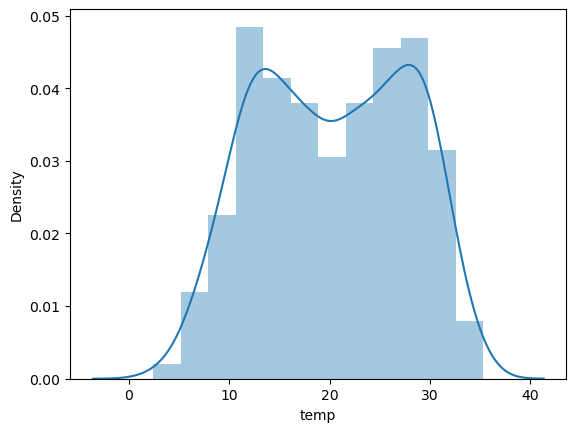

In [39]:
# Temperature in Celsius
sns.distplot(bike_sharing['temp'])
plt.show()

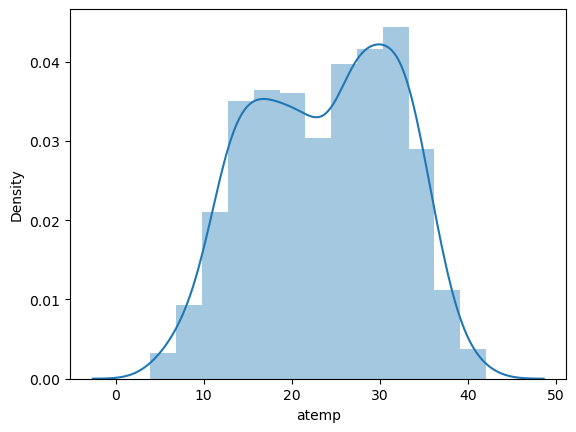

In [41]:
# Feeling temperature in Celsius
sns.distplot(bike_sharing['atemp'])
plt.show()

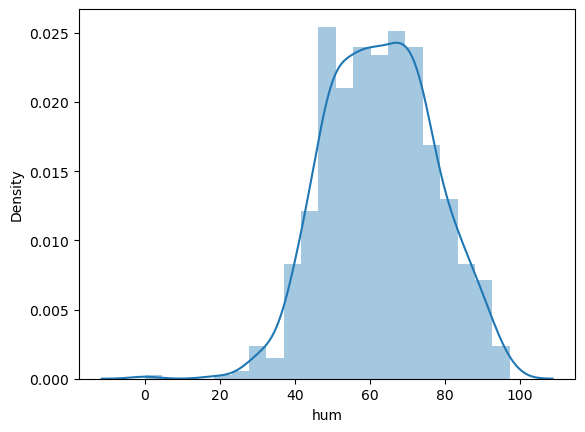

In [43]:
# Humidity
sns.distplot(bike_sharing['hum'])
plt.show()

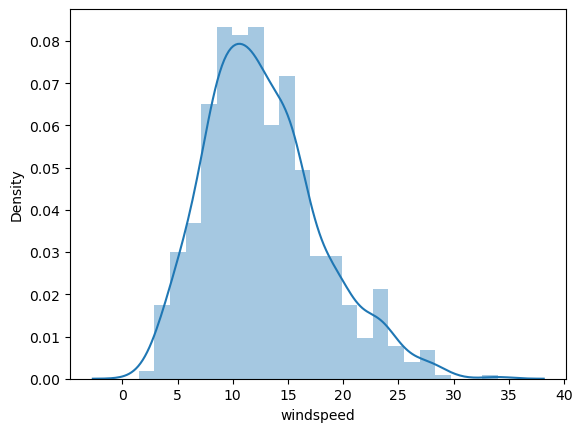

In [45]:
# Wind speed
sns.distplot(bike_sharing['windspeed'])
plt.show()

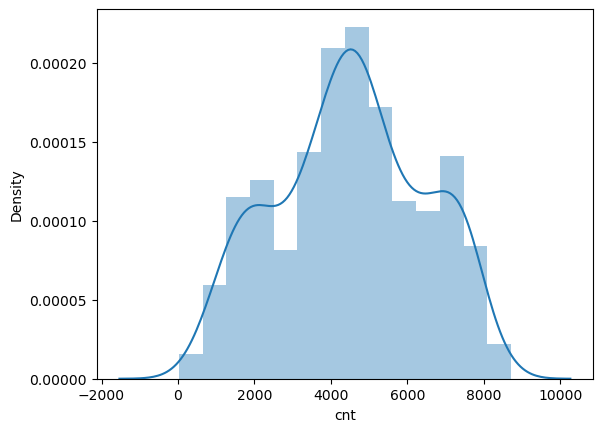

In [47]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(bike_sharing['cnt'])
plt.show()

### Visualising Numeric Variables

In [49]:
# Converting "cnt" numeric variables to float 
list = ["cnt"]

for var in list:
    bike_sharing[var] = bike_sharing[var].astype("float")

In [51]:
# Analysing numerical variables
bs_numerical = bike_sharing[['temp','atemp','hum','windspeed','cnt']]
bs_numerical.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


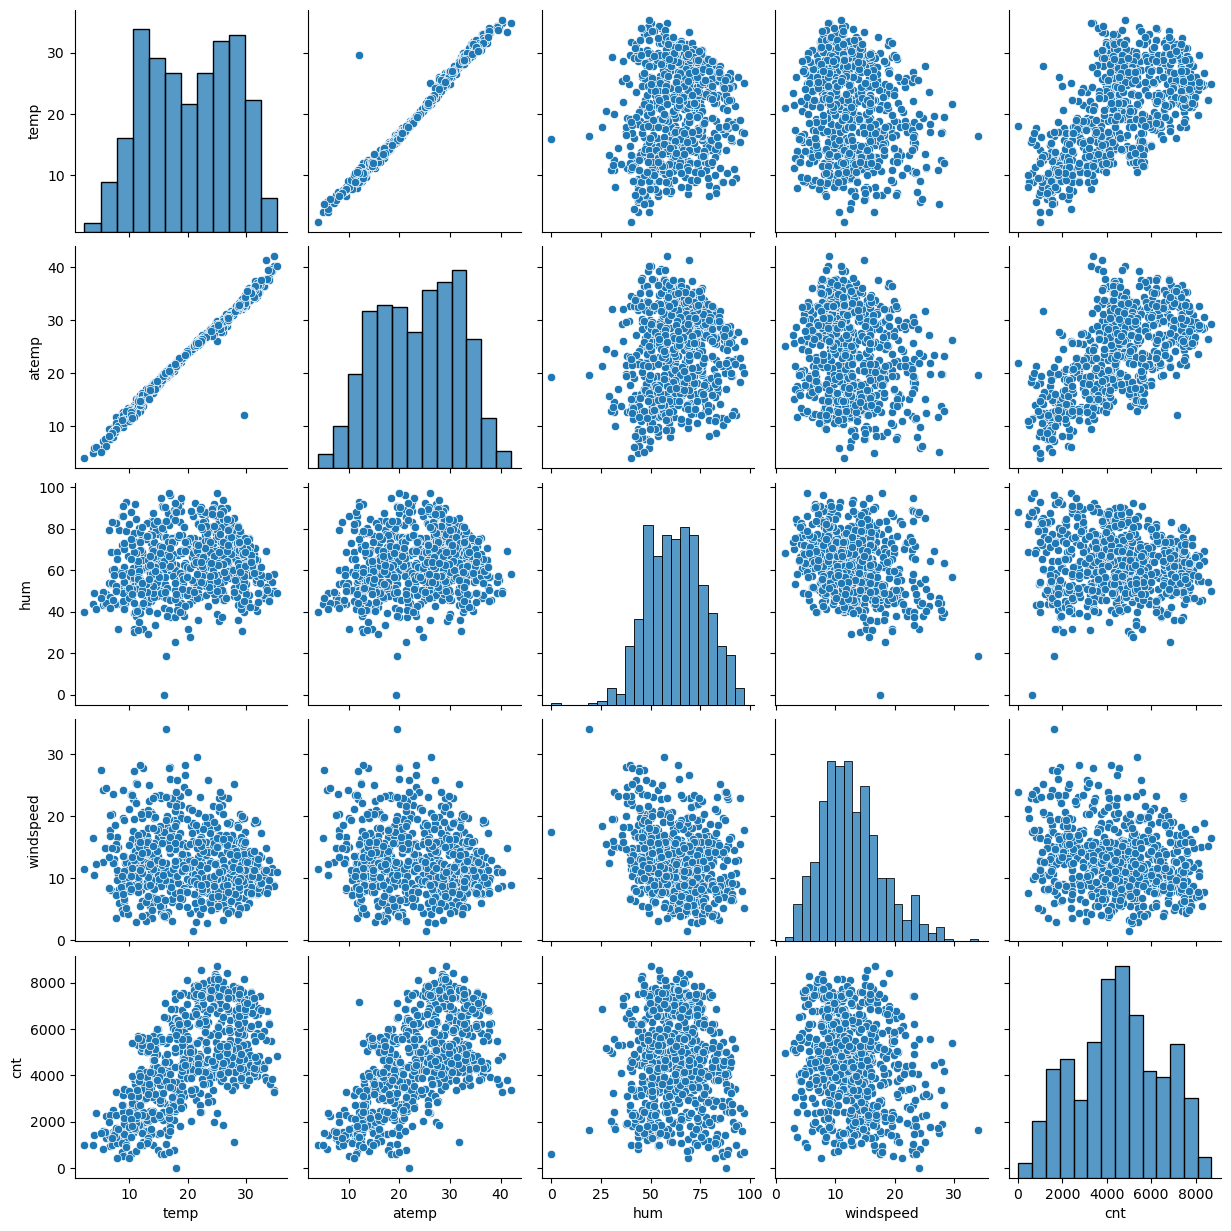

In [53]:
sns.pairplot(bs_numerical)
plt.show()

In [55]:
#Correlation analysis
bike_corr = bs_numerical.corr()
bike_corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


<Axes: >

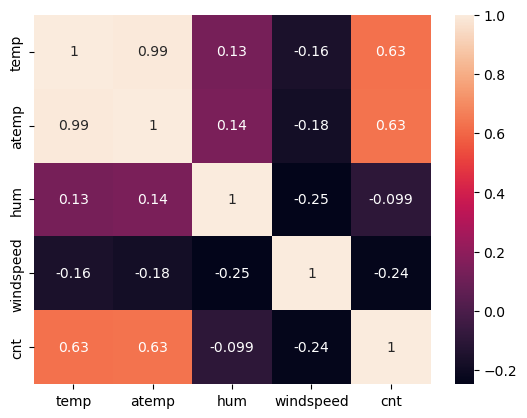

In [57]:
sns.heatmap(bike_corr, annot=True)

 -  The target variable 'cnt' is highly correlated with temp and atemp variables. 
 -  Since cnt is highly correlated with temp and atemp, this suggest that the bike demand will be high with high temperature days.
 -  The target variable 'cnt' is negatively correlated with hum and windspeed.
 -  As the windspeed increses the bike demand will be less.
 -  Temp and atemp are highly correlated. This shows multicollinearity between them. So we can drop either of these variables.

In [59]:
#removing atemp as it is highly correlated with temp
bike_sharing.drop('atemp',axis=1,inplace=True)

In [61]:
bike_sharing.shape

(730, 11)

### Visualising Categorical Variables

In [63]:
# Analysing all categorical columns
bs_categorical = bike_sharing[['season','mnth', 'weekday', 'weathersit']]
bs_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A


## Univariate Analysis

In [65]:
def bar_graph_plot(bike_sharing, columns, title_prefix='Bar Graph of '): 
    for ord_cat in columns: 
        plt.figure(figsize=(5, 3)) 
        bike_sharing[ord_cat].value_counts().plot.bar() 
        plt.title(f'{title_prefix}{ord_cat}') 
        plt.xlabel(ord_cat) 
        plt.ylabel('Frequency') 
        plt.show() 

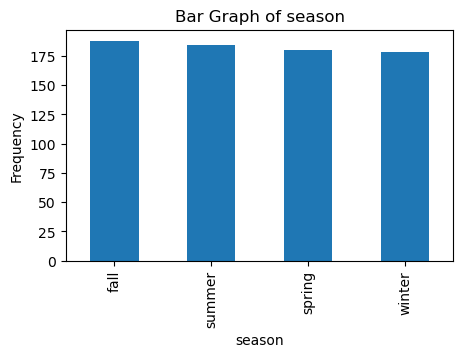

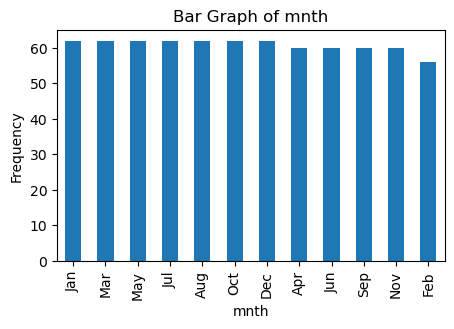

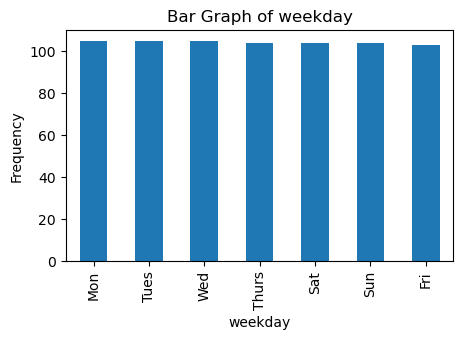

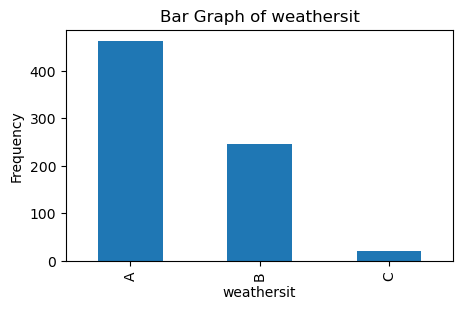

In [67]:
columns = ['season', 'mnth', 'weekday', 'weathersit']
bar_graph_plot(bike_sharing, columns)

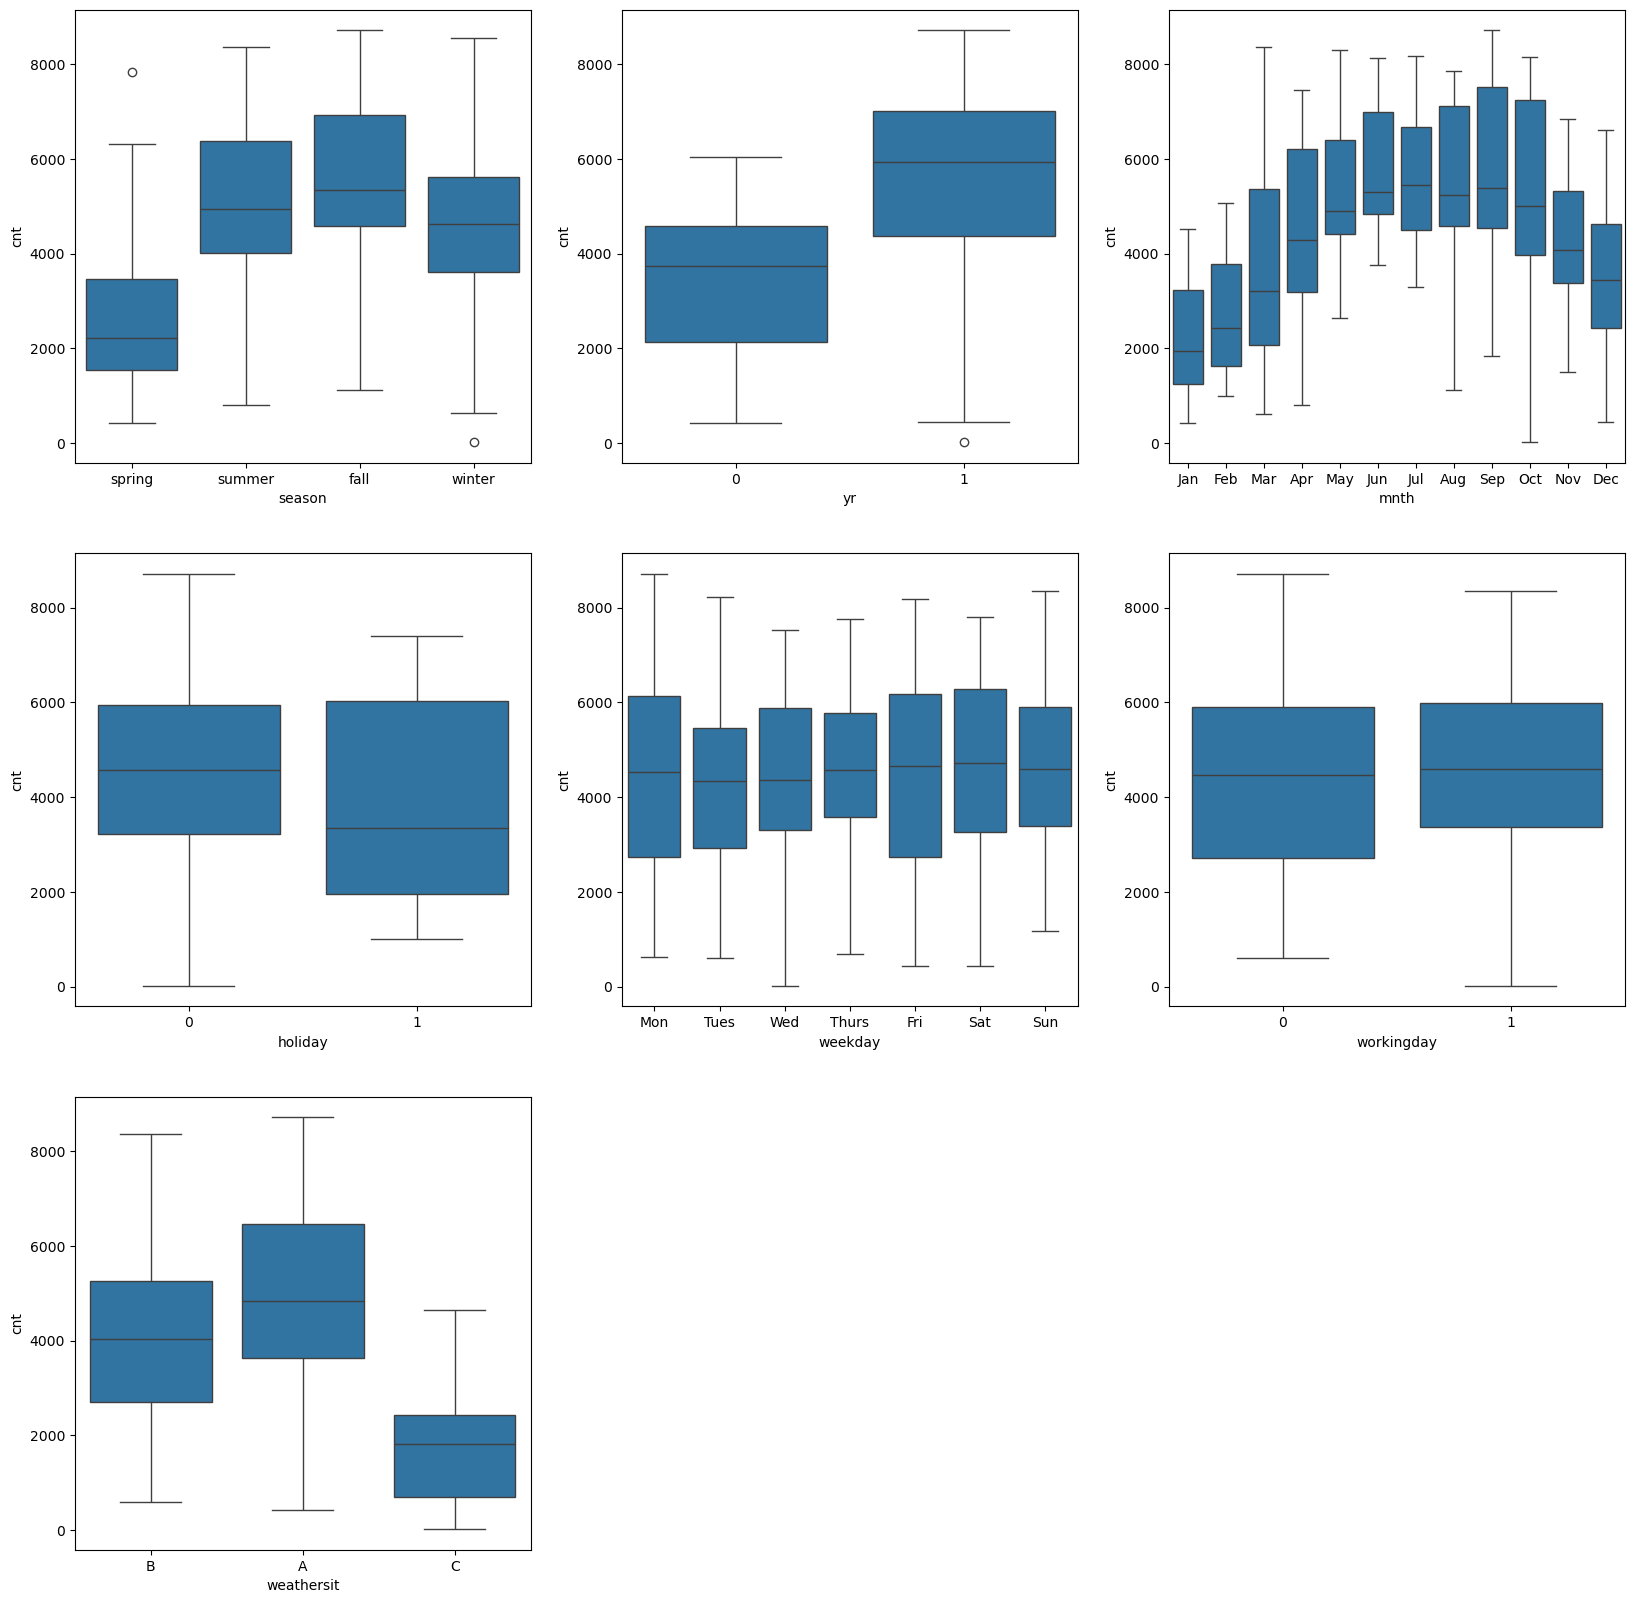

In [69]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

## Bivariate Analysis

In [71]:
def bar_graph_plot(bike_sharing, columns, title_prefix='Bar Graph of '): 
    for ord_cat in columns: 
        plt.figure(figsize = (12,4))
        plt.subplot(1,2,1)
        sns.barplot(x=ord_cat,y='cnt',data=bike_sharing)
        plt.subplot(1,2,2)
        sns.barplot(x=ord_cat,y='cnt',data=bike_sharing, hue='yr',palette='Set1')
        plt.legend(labels=['2018', '2019'])
        plt.show()

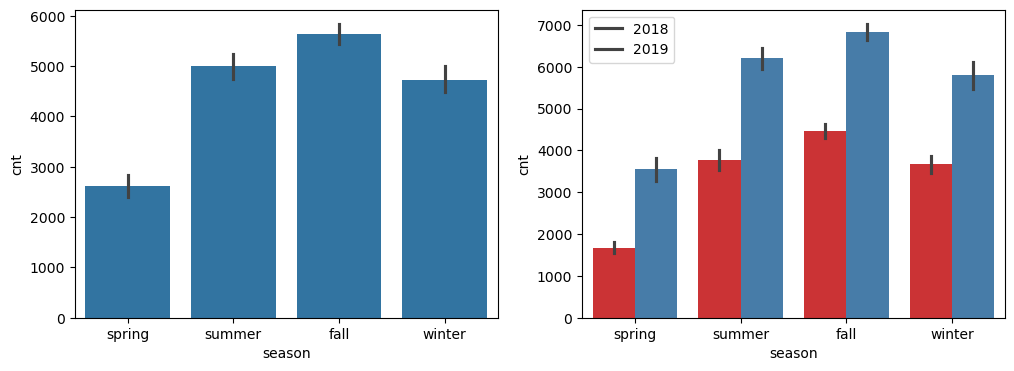

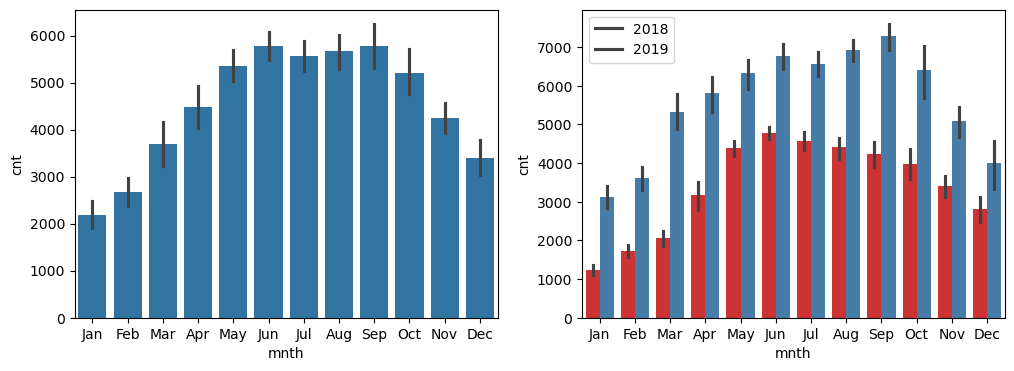

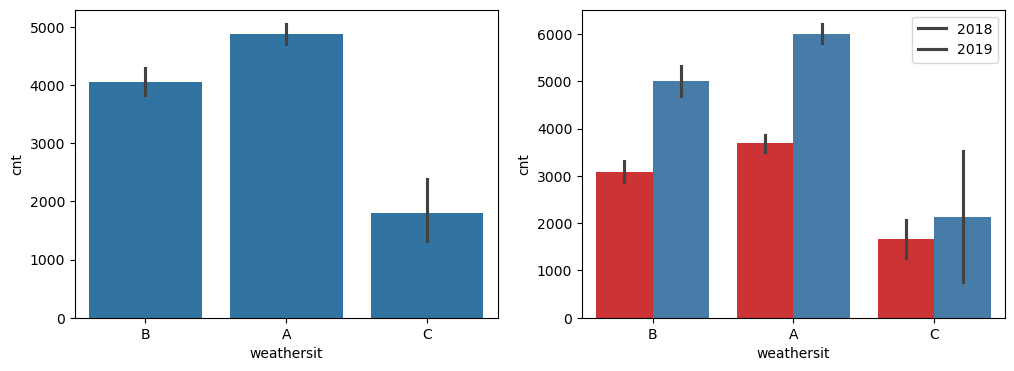

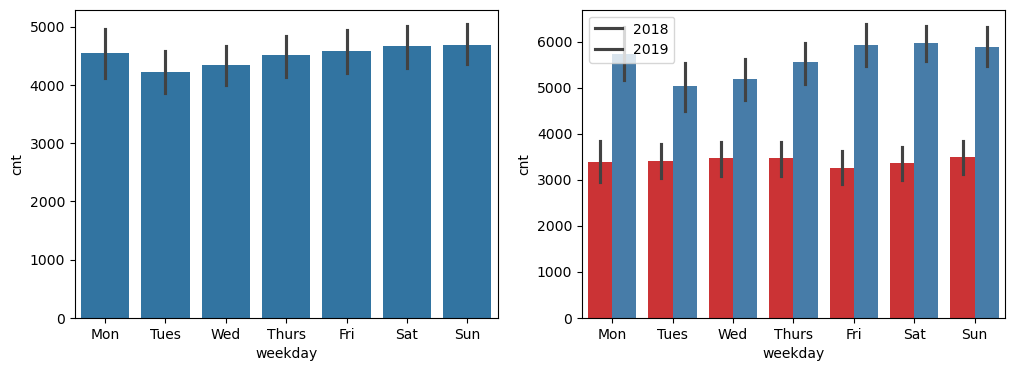

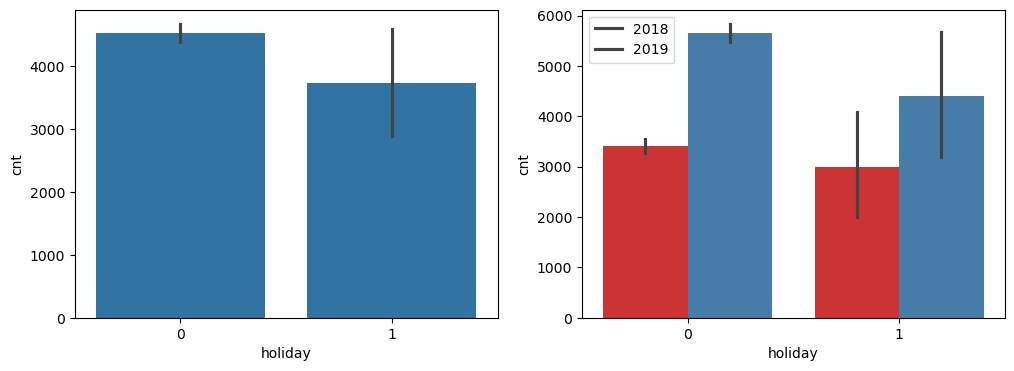

In [73]:
columns = ['season','mnth','weathersit','weekday','holiday']
bar_graph_plot(bike_sharing, columns)

 -  More bookings are seen in the season 'Fall' followed by 'summer, winter, spring'. 2019 has more booking than 2018 for all seasons.
 -  Booking is more during the months June, July, August, September. The booking is gradually increasing from January till September and then decreases.
 -  Clear weather shows more booking and booking is more in 2019 than 2018.
 -  While analysing the booking, we can see the bookings are comparable. Out of these Saturday, Sunday and Monday shows high bookings.
 -  Booking is less on holidays.
 -  2019 attracted a greater number of bookings from the previous year, which shows good progress in terms of business.


## Step 3: Data Preparation

In [75]:
bs_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


The variables having different levels to be changed to integer values using dummy variables.

In [77]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,B,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Tues,0,B,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Thurs,1,A,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,1600.0


In [79]:
#Converting to dummy variables
bs_dummies = pd.get_dummies(bs_categorical, drop_first=True)
bs_dummies = bs_dummies.astype(int)
bs_dummies.head()
print(bs_dummies.shape)

(730, 22)


In [81]:
#Concatinating dummy variables to the original dataframe and removing the bike_sharing_categorical_columns as we have already added the dummy variables
bike_sharing = pd.concat([bike_sharing, bs_dummies], axis = 1)
bike_sharing.drop(bs_categorical.columns, axis = 1, inplace = True)

In [83]:
bike_sharing.shape

(730, 29)

In [85]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    float64
 7   season_spring  730 non-null    int32  
 8   season_summer  730 non-null    int32  
 9   season_winter  730 non-null    int32  
 10  mnth_Aug       730 non-null    int32  
 11  mnth_Dec       730 non-null    int32  
 12  mnth_Feb       730 non-null    int32  
 13  mnth_Jan       730 non-null    int32  
 14  mnth_Jul       730 non-null    int32  
 15  mnth_Jun       730 non-null    int32  
 16  mnth_Mar       730 non-null    int32  
 17  mnth_May       730 non-null    int32  
 18  mnth_Nov  

## Step 4: Splitting the Data into Training and Testing Sets

In [87]:
# The first basic step for regression is performing a train-test split. Splitting the dataframe into train and test sets.
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size=0.70, random_state=100)

In [89]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
576,1,0,1,29.246653,70.4167,11.083475,7216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [91]:
print("Dataframe set: ",bike_sharing.shape)
print("Train set: ",df_train.shape)
print("Test set: ",df_test.shape)

Dataframe set:  (730, 29)
Train set:  (510, 29)
Test set:  (220, 29)


### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. Using MinMax scaling.

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
# Instantiate an object
scaler = MinMaxScaler()

In [97]:
#  Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
bike_var = ['temp', 'hum', 'windspeed','cnt']

df_train[bike_var] = scaler.fit_transform(df_train[bike_var])

In [99]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [101]:
df_train[bike_var].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


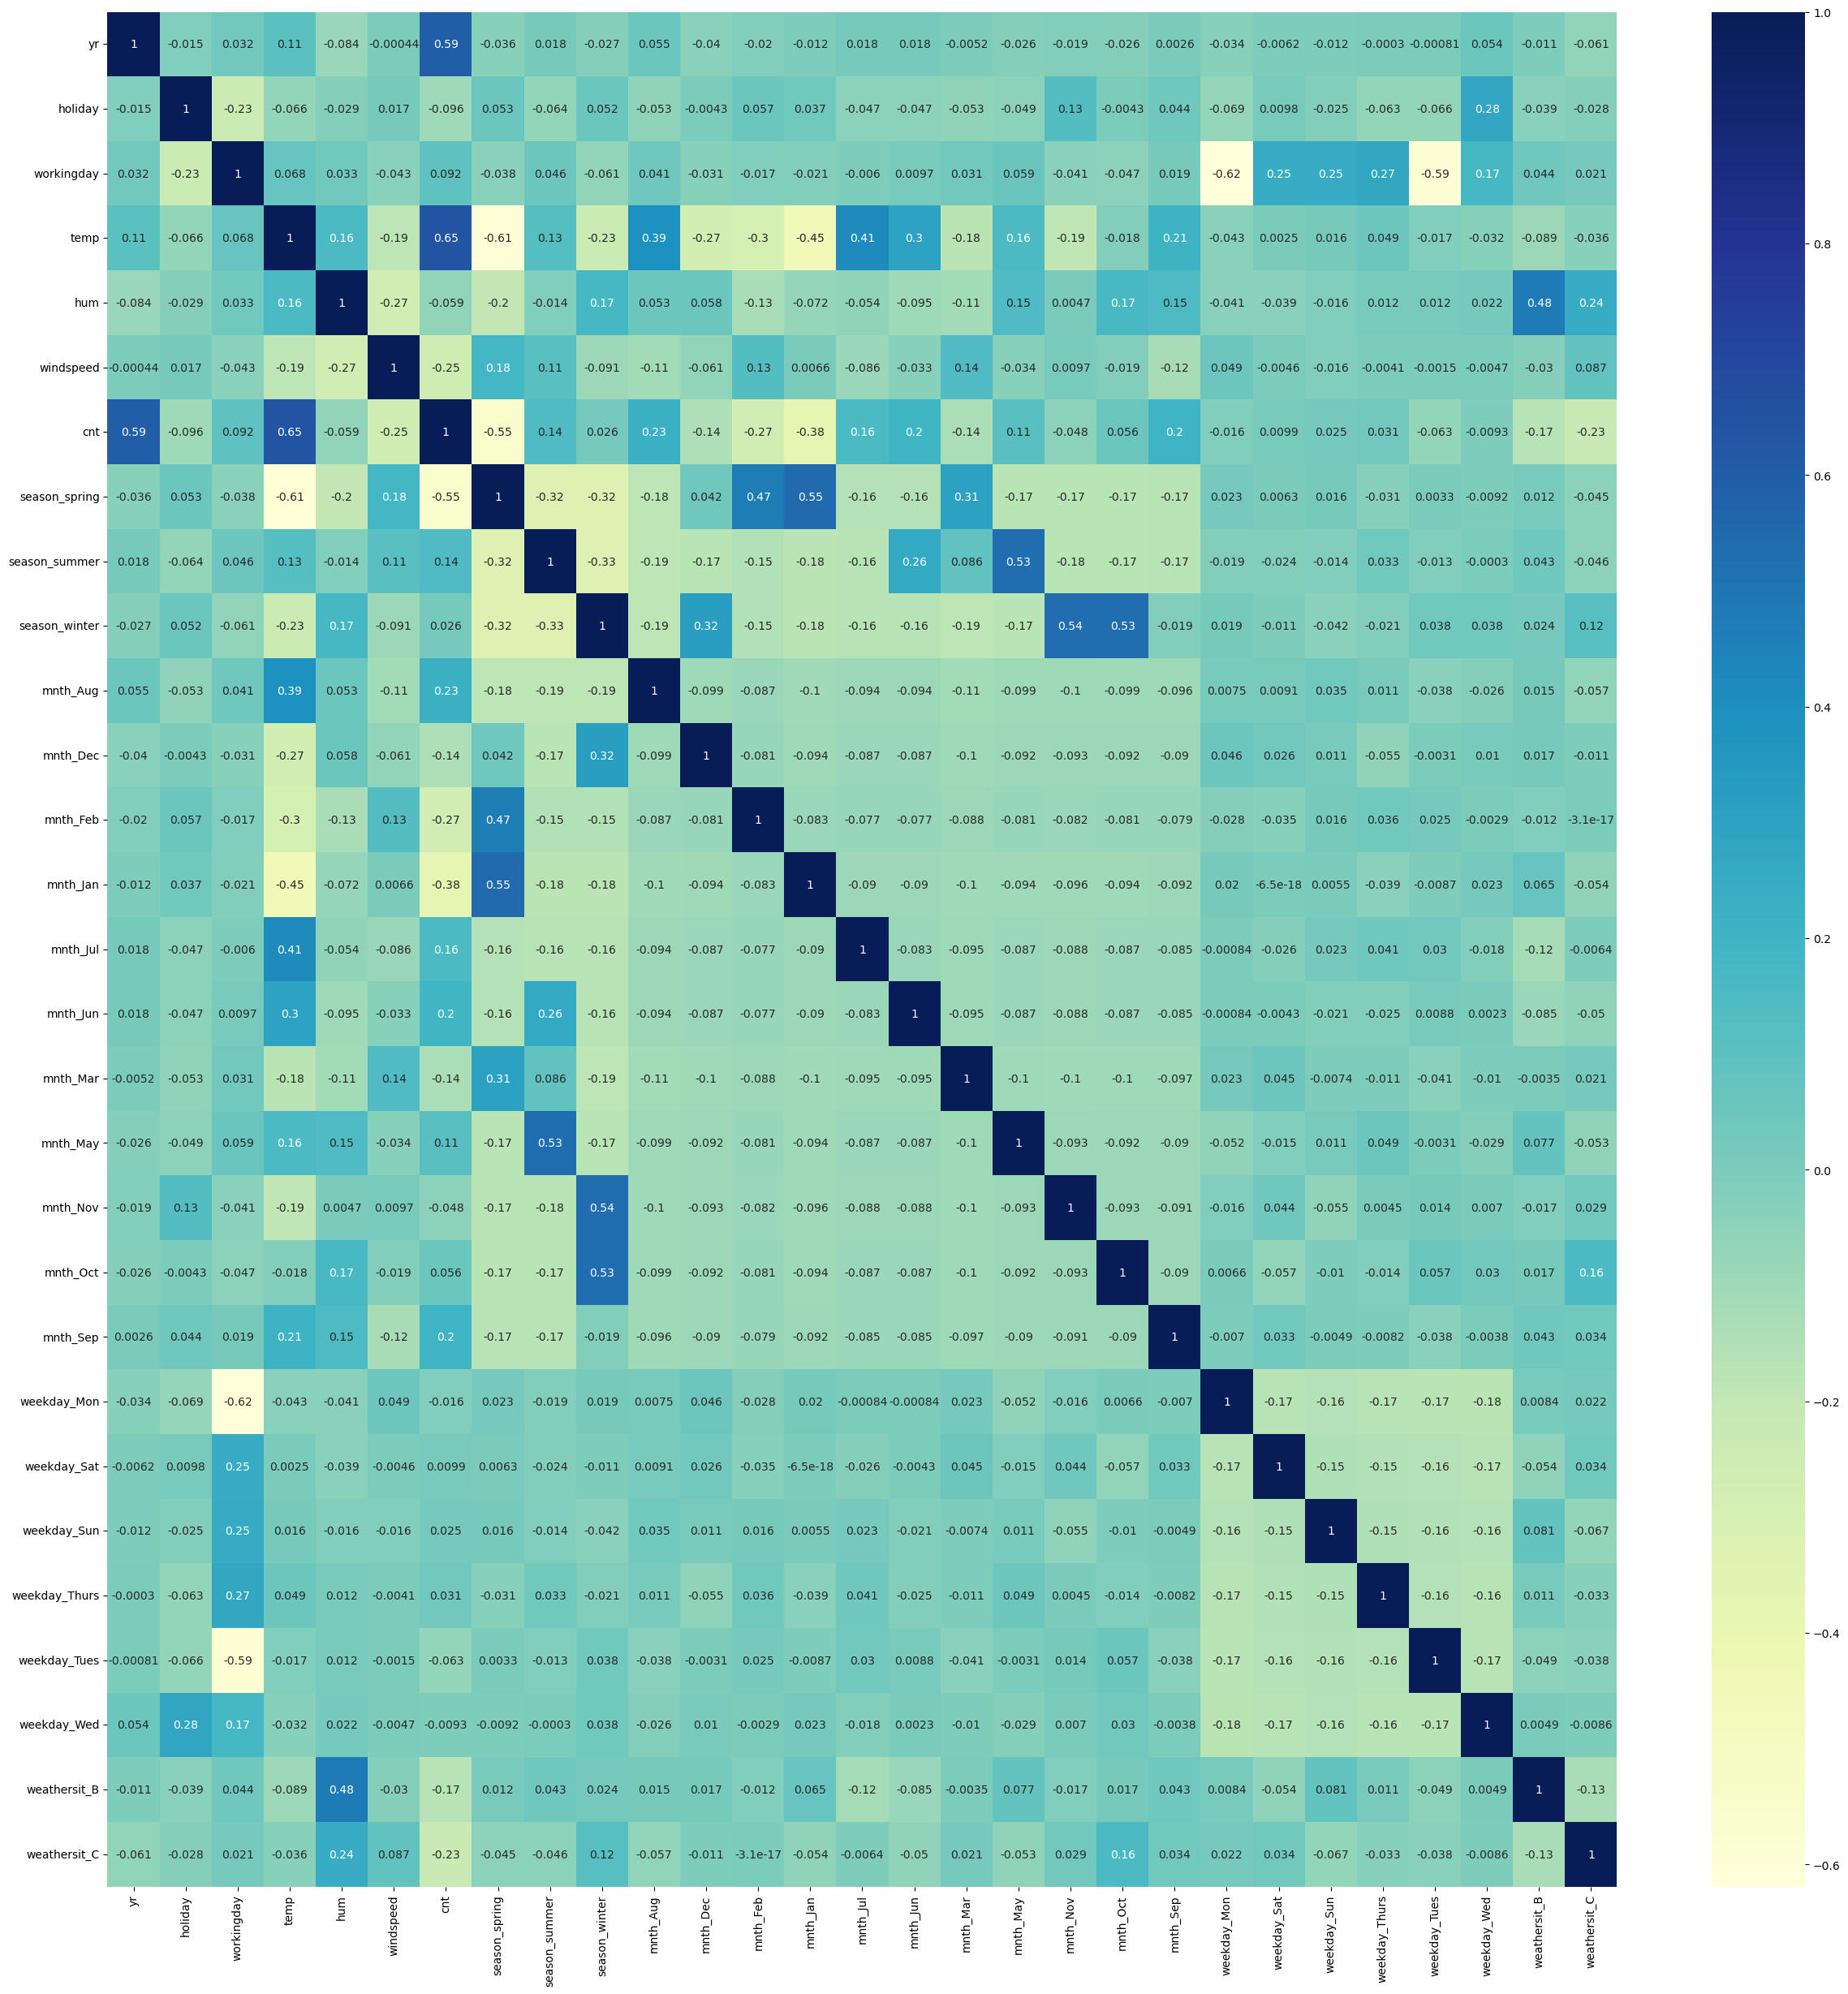

In [103]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

temp is most correlated with the target variable cnt.

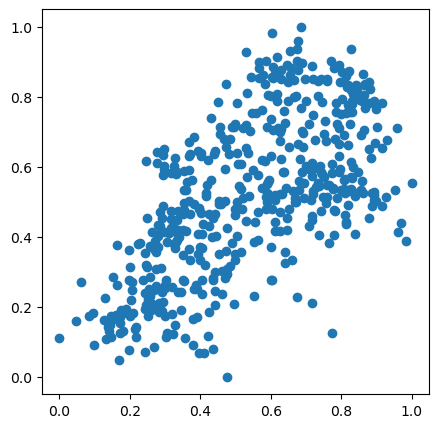

In [105]:
plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [107]:
#Removing 'casual' and 'registered'
y_train = df_train.pop('cnt')
X_train = df_train

In [109]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [111]:
X_train.shape

(510, 28)

## Step 5: Building the Linear Model

In [113]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [115]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [117]:
#List of 15 variables selected using RFE
(X_train.columns,rfe.support_,rfe.ranking_)

(Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
        'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
        'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
        'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
        'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
        'weekday_Wed', 'weathersit_B', 'weathersit_C'],
       dtype='object'),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False, False,  True, False, False, False, False,
        False,  True,  True, False, False, False,  True, False,  True,
         True]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  3,  4,  2,  1, 12, 13,  6,
         5, 10,  1,  1, 11, 14,  9,  1,  7,  1,  1]))

In [119]:
# Getting selected variables in col
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mon', 'weekday_Tues', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

In [121]:
# checking the rejected columns
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [123]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_Mon,weekday_Tues,weathersit_B,weathersit_C
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


In [125]:
# Building the First linear regression model
import statsmodels.api as sm 

# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_rfe)
# Running the linear model
lr1 = sm.OLS(y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.11e-191
Time:                        22:50:57   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

In [127]:
lr1.params

const            0.199526
yr               0.229763
holiday         -0.018447
workingday       0.083669
temp             0.527708
hum             -0.161086
windspeed       -0.180875
season_spring   -0.055546
season_summer    0.053733
season_winter    0.099214
mnth_Jul        -0.054616
mnth_Sep         0.081983
weekday_Mon      0.093668
weekday_Tues     0.040636
weathersit_B    -0.056344
weathersit_C    -0.245009
dtype: float64

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

The VIF should be less than 5.

In [129]:
# Generic function to calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF_cal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [131]:
VIF_cal(X_train_rfe)

,Features,VIF
2,workingday,50.68
11,weekday_Mon,12.20
12,weekday_Tues,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
13,weathersit_B,1.57


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables need to be dropped as they are insignificant or highly correlated. 
One of these variables is, `holiday` as it has a high p-value of `0.386`. We can drop this variables.

In [133]:
# Dropping insignificant variables
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [135]:
# Building the Second linear regression model
X_train_lm = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train,X_train_lm).fit() 
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.11e-191
Time:                        22:51:13   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1811      0.042      4.301

In [137]:
VIF_cal(X_train_new)

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_Mon,4.91
5,season_spring,4.80
11,weekday_Tues,4.76
7,season_winter,3.69
6,season_summer,3.04
12,weathersit_B,2.31


### Dropping the Variable and Updating the Model

As we can notice some of the variables (hum, temp, workingday) have high VIF values but they have low p-values. Hence dropping the hum variable and rebuilding the model.

In [139]:
# Dropping highly correlated variable
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [141]:
# Building the Third linear regression model
X_train_lm = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train,X_train_lm).fit() 
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.28e-188
Time:                        22:51:44   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1008      0.038      2.624

In [143]:
VIF_cal(X_train_new)

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,weekday_Mon,4.45
10,weekday_Tues,4.21
4,season_spring,3.82
6,season_winter,2.78
5,season_summer,2.76
0,yr,2.07
7,mnth_Jul,1.60


### Dropping the Variable and Updating the Model

`workingday` has high VIF value. Hence dropping the variable.

In [145]:
# Dropping highly correlated variable
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [147]:
# Building the Fourth linear regression model
X_train_lm = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train,X_train_lm).fit() 
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.06e-186
Time:                        22:52:03   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2003      0.030      6.760

In [149]:
VIF_cal(X_train_new)

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,season_summer,2.24
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_Jul,1.59
10,weathersit_B,1.55
7,mnth_Sep,1.33
8,weekday_Mon,1.22


### Dropping the Variable and Updating the Model

The variable `weekday_Mon` has p-value 0.171 which is greater than 0.05. So dropping this variable.

In [151]:
# Dropping insignificant variable
X_train_new = X_train_new.drop(['weekday_Mon'], axis=1)

In [153]:
# Building the Fifth linear regression model
X_train_lm = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train,X_train_lm).fit() 
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          3.37e-187
Time:                        22:52:17   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2034      0.030      6.877

In [155]:
VIF_cal(X_train_new)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_Jul,1.59
9,weathersit_B,1.55
7,mnth_Sep,1.33
8,weekday_Tues,1.17


### Dropping the Variable and Updating the Model

dropping `mnth_Jul` variable.

In [157]:
# Dropping insignificant variable
X_train_new = X_train_new.drop(['mnth_Jul'], axis=1)

In [159]:
# Building the Sixth linear regression model
X_train_lm = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train,X_train_lm).fit() 
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          5.70e-187
Time:                        22:52:34   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1956      0.030      6.611

In [161]:
VIF_cal(X_train_new)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
8,weathersit_B,1.55
6,mnth_Sep,1.22
7,weekday_Tues,1.17
9,weathersit_C,1.08


In [163]:
lr6.params

const            0.195618
yr               0.234391
temp             0.479457
windspeed       -0.149843
season_spring   -0.057246
season_summer    0.062339
season_winter    0.093716
mnth_Sep         0.085435
weekday_Tues    -0.046099
weathersit_B    -0.078980
weathersit_C    -0.285587
dtype: float64

#### Considering the above model lr6, as it seems to have very low multicolinearity between the predictors and the VIFs and p-values both are within the acceptable range. F-Statistics value of 249.5 (which is greater than 1) and the p-value of 5.70e-187 i.e almost equals to zero, states that the overall model is significant

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [165]:
y_train_pred = lr6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

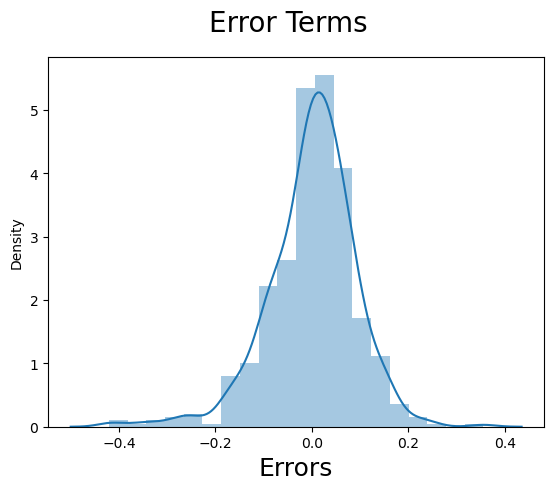

In [167]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        

#### Multi Colinearity

In [169]:
VIF_cal(X_train_new)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
8,weathersit_B,1.55
6,mnth_Sep,1.22
7,weekday_Tues,1.17
9,weathersit_C,1.08


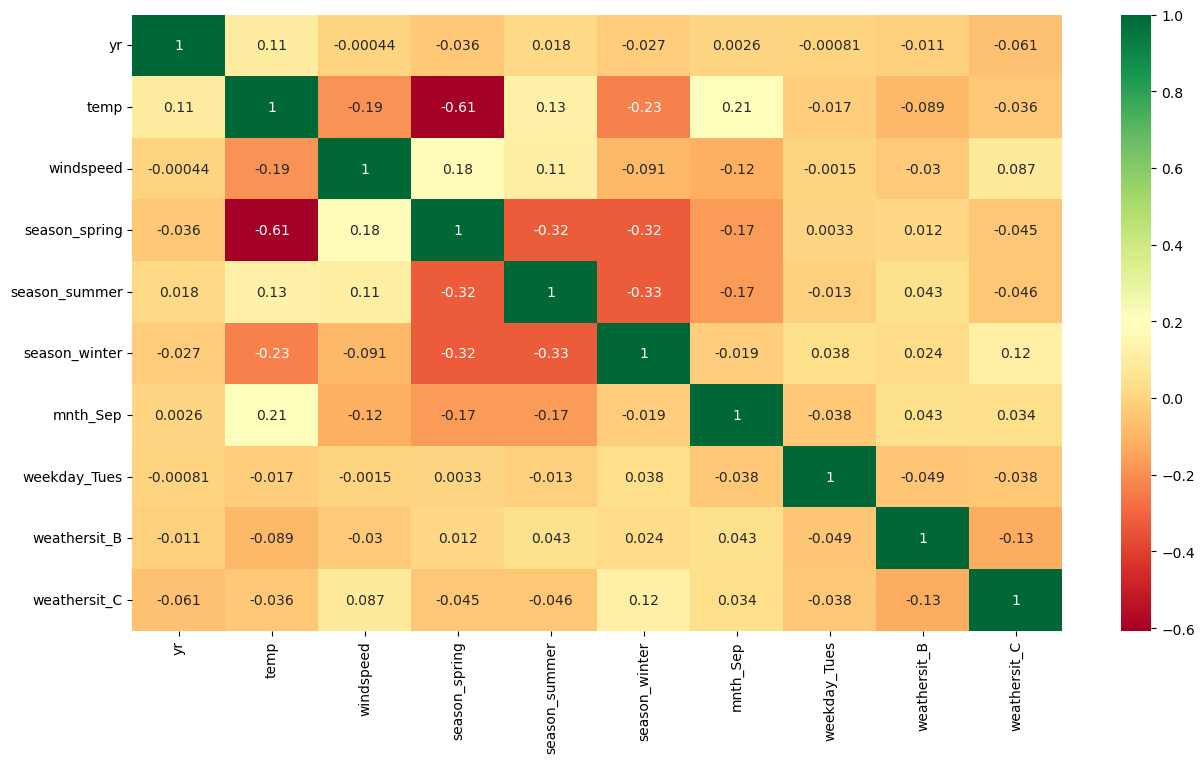

In [171]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

There is no multiColinearity

#### Linearity 

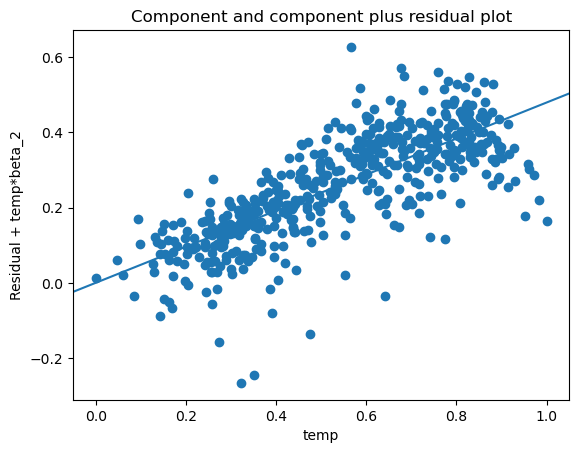

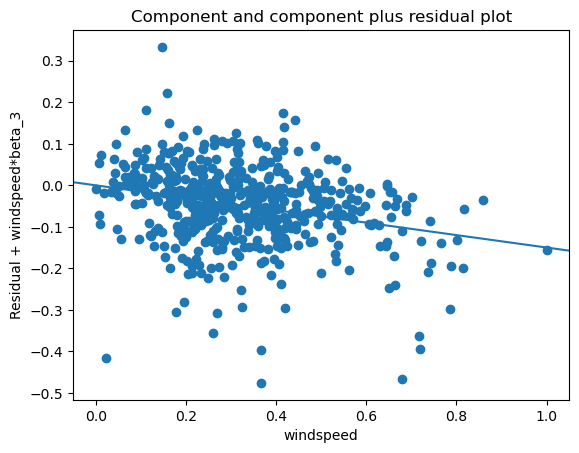

In [173]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

#### Homoscedasticity

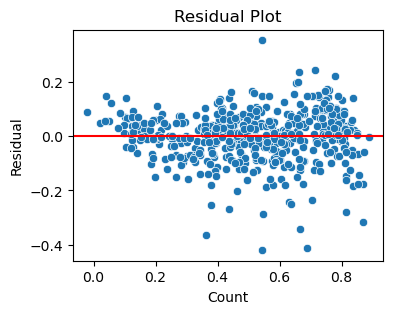

In [175]:
y_train_pred = lr6.predict(X_train_lm) 
residual = y_train - y_train_pred

plt.figure(figsize=(4, 3)) 
sns.scatterplot(x=y_train_pred, y=residual) 
plt.axhline(y=0, color='r', linestyle='-') 
plt.xlabel('Count') 
plt.ylabel('Residual') 
plt.title('Residual Plot') 
plt.show()

The model's predictions are unbiased and that errors are randomly distributed.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, now we can make predictions using the final model.

In [177]:
# Applying the scaling on the test sets
bike_var = ['temp', 'hum', 'windspeed','cnt']
df_test[bike_var] = scaler.transform(df_test[bike_var])

In [179]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [183]:
col2 = X_train_new.columns
X_test = X_test[col2]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [185]:
# Making predictions using the fourth model

y_pred = lr6.predict(X_test_lm)

## Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

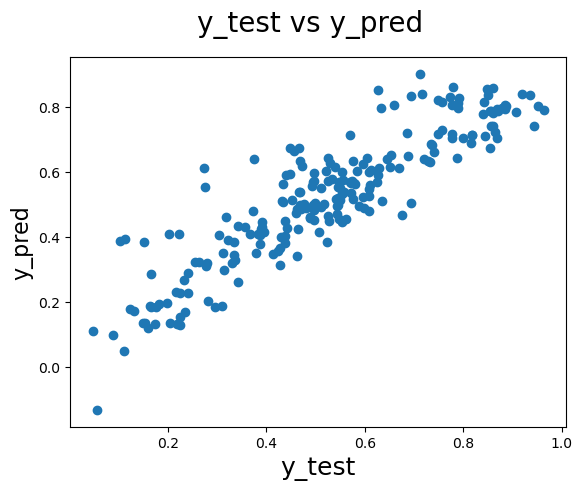

In [187]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [189]:
# calculate the R-squared score on the test set.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.803190810381663

In [191]:
round(lr6.params,4)

const            0.1956
yr               0.2344
temp             0.4795
windspeed       -0.1498
season_spring   -0.0572
season_summer    0.0623
season_winter    0.0937
mnth_Sep         0.0854
weekday_Tues    -0.0461
weathersit_B    -0.0790
weathersit_C    -0.2856
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1956 + 0.2344  \times  yr + 0.4795 \times temp- 0.1498  \times  windspeed  - 0.0572 \times season_spring + 0.0623 \times season_summer + 0.0937 \times season_winter + 0.0854 \times mnth_Sep - 0.0461 \times weekday_Tues - 0.0790 \times weathersit_B - 0.2856 \times weathersit_C $

In [193]:
# Calculating Adjusted-R^2 value for the test dataset
r2 = r2_score(y_test, y_pred)
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7938


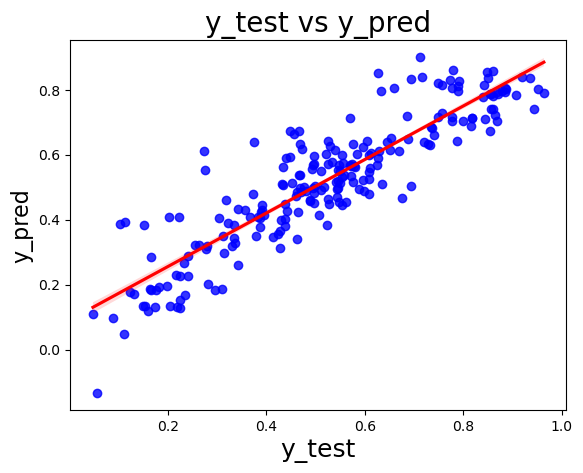

In [195]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.803
    - Train dataset Adjusted R^2 : 0.830   
    - Test dataset Adjusted R^2  : 0.794